# **Database spotify.**
Análisis EDA inicial con análisis de la data general, estadísticas descriptivas, visualizaciones y primeros hayazgos en correlación de variables.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar el dataset
df = pd.read_csv("dataset.csv")

# 2. Información general
print("📌 Información general del dataset:")
print(df.info())

📌 Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6097 entries, 0 to 6096
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        6097 non-null   int64  
 1   track_id          6097 non-null   object 
 2   artists           6097 non-null   object 
 3   album_name        6097 non-null   object 
 4   track_name        6097 non-null   object 
 5   popularity        6096 non-null   float64
 6   duration_ms       6096 non-null   float64
 7   explicit          6096 non-null   object 
 8   danceability      6096 non-null   float64
 9   energy            6096 non-null   float64
 10  key               6096 non-null   float64
 11  loudness          6096 non-null   float64
 12  mode              6096 non-null   float64
 13  speechiness       6096 non-null   float64
 14  acousticness      6096 non-null   float64
 15  instrumentalness  6096 non-null   float64
 16  livenes

# **Estadísticas descriptivas.**

In [ ]:
# 3. Estadísticas descriptivas
print("\n📊 Estadísticas descriptivas (variables numéricas):")
print(df.describe())


📊 Estadísticas descriptivas (variables numéricas):
        Unnamed: 0   popularity   duration_ms  danceability       energy  \
count  6097.000000  6096.000000  6.096000e+03   6096.000000  6096.000000   
mean   3048.000000    36.305446  2.296678e+05      0.532989     0.591847   
std    1760.196627    23.765035  8.304413e+04      0.169291     0.284866   
min       0.000000     0.000000  3.182400e+04      0.000000     0.001440   
25%    1524.000000    18.000000  1.827295e+05      0.424000     0.359000   
50%    3048.000000    43.000000  2.217330e+05      0.542000     0.654500   
75%    4572.000000    54.000000  2.616400e+05      0.659000     0.844000   
max    6096.000000    93.000000  1.478618e+06      0.974000     1.000000   

               key     loudness         mode  speechiness  acousticness  \
count  6096.000000  6096.000000  6096.000000  6096.000000   6096.000000   
mean      5.351542    -9.291292     0.617782     0.064338      0.353448   
std       3.553774     6.332752     0.

In [ ]:
print("\n📊 Conteo de valores por variables categóricas:")
categorical_cols = ['artists', 'album_name', 'track_name', 'track_genre', 'explicit']
for col in categorical_cols:
    if col in df.columns:
        print(f"\n{col}:")
        print(df[col].value_counts().head(10))  # solo top 10



📊 Conteo de valores por variables categóricas:

artists:
artists
Red Hot Chili Peppers    59
Kato                     56
Criolo                   56
Jorge Drexler            52
Los Amigos Invisibles    49
The Neighbourhood        47
Ludovico Einaudi         41
Jason Mraz               41
Weezer                   40
Sleeping At Last         40
Name: count, dtype: int64

album_name:
album_name
Alternative Christmas 2022                                       49
Halloween Metal Nights                                           30
Triste Hora                                                      28
Metal                                                            26
Serenity                                                         25
Rock un sentimiento vol. I                                       25
Santa's Christmas List                                           25
Rock x siempre                                                   23
One-Man Tour 2021-2022 -Editorial-@Saitama Super Arena (LIVE

# **Visualizaciones.**

In [ ]:
# 4. Gráficas
plt.figure(figsize=(10, 5))
df['popularity'].hist(bins=20, edgecolor='black')
plt.title("Distribución de Popularidad de canciones")
plt.xlabel("Popularidad")
plt.ylabel("Frecuencia")
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
df['track_genre'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Géneros más frecuentes")
plt.xlabel("Género")
plt.ylabel("Número de canciones")
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='danceability', y='energy', alpha=0.5)
plt.title("Relación entre Danceability y Energy")
plt.show()


In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='valence', y='popularity', alpha=0.5)
plt.title("Relación entre Valence y Popularidad")
plt.show()

In [ ]:
# 5. Resumen de patrones y anomalías
print("\n🔍 Datos faltantes por columna:")
print(df.isnull().sum())

print("\n🔍 Resumen:")
print("- Variables numéricas con diferentes escalas, requieren normalización si se usan en ML.")
print("- Puede haber outliers en duración (canciones muy largas/cortas).")
print("- Popularidad puede estar sesgada hacia artistas más conocidos.")
print("- Revisar valores únicos en columnas categóricas como Track_genre y Artists.")


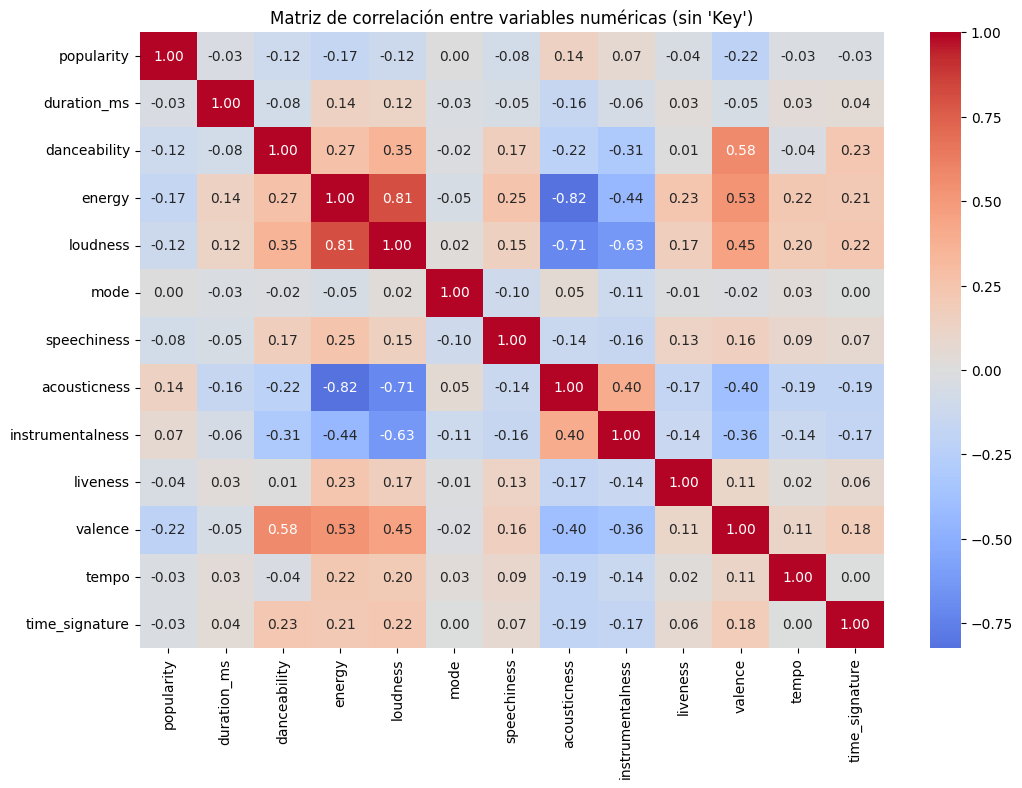

In [ ]:
# 6. Matriz de correlación (ignorando 'Key')
plt.figure(figsize=(12, 8))

# Excluir la columna 'Key' si existe
numeric_df = df.drop(columns=['key'], errors='ignore')

# Excluir la columna 'Key' si existe
numeric_df = numeric_df.drop(columns=['Unnamed: 0'], errors='ignore')

# Calcular correlación
corr = numeric_df.corr(numeric_only=True)

# Heatmap con números dentro de cada celda
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)

plt.title("Matriz de correlación entre variables numéricas (sin 'Key')")
plt.show()


In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='loudness', y='energy', alpha=0.5)
plt.title("Relación entre Loudness y Energy")
plt.xlabel("Loudness (dB)")
plt.ylabel("Energy")
plt.show()


In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='danceability', y='valence', alpha=0.5)
plt.title("Relación entre Danceability y Valence")
plt.xlabel("Danceability")
plt.ylabel("Valence")
plt.show()


In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='explicit', y='speechiness')
plt.title("Relación entre Speechiness y Explicit")
plt.xlabel("Explicit (0=No, 1=Sí)")
plt.ylabel("Speechiness")
plt.show()

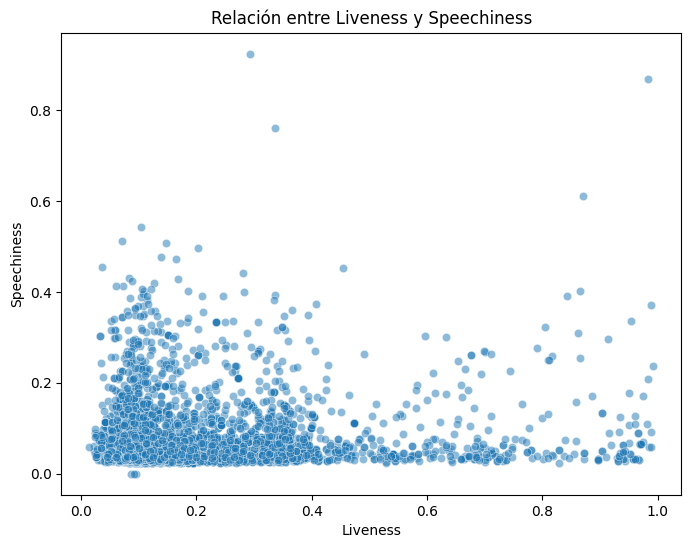

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='liveness', y='speechiness', alpha=0.5)
plt.title("Relación entre Liveness y Speechiness")
plt.xlabel("Liveness")
plt.ylabel("Speechiness")
plt.show()

# **Hallazgos.**

1. No se muestran muchas correlaciones altas en la matriz de correlación.
2. Nuestra variable objetivo, popularity, no tiene correlaciones fuertes; las más altas son bajas–moderadas y no bastan para una regresión lineal simple confiable .
3. Los valores faltantes se concentran en columnas categóricas como album_name y track_genre. En las numéricas, los faltantes son bajos o nulos.
4. Popularity: distribución sesgada hacia valores bajos–medios; pocas canciones alcanzan puntuaciones muy altas. Implica un objetivo desbalanceado que podría requerir técnicas de muestreo o métricas robustas.
5. Duration_ms: presencia de outliers (canciones extremadamente largas/cortas).
6. Pop domina la frecuencia, seguido por hip-hop y rock. Esto sugiere sesgo hacia géneros mainstream, con menor representación de géneros minoritarios.

